# Importing Essential Libraries

In [1]:
import sys
!{sys.executable} -m pip install pandas-profiling
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip  install catboost

You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.


In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

We import the dataset that has been cleaned and does not contain any duplicates.

In [2]:
wine_data = pd.read_csv("binned_no_dup.csv")

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


# Comparing the variables against 'good' and 'bad' wines

We plot a boxplot, distribution plot, and violinplot for each variable. The boxplot compares the levels of each variable between the 'bad' wines and the 'good' wines. The distribution plot and the violinplot shows us how each variable is distributed along its range of values.

From the boxplots, we note that variables such as 'alcohol' may have a relationship with wine quality. 'Good' wines have a higher median alcohol level, compared to 'bad' wines, for instance. On the other hand, variables such as 'pH' do not seem to affect the perception of whether a wine is 'good' or 'bad'.

From the distribution plots and violinplots, we note that some variables seem to follow a normal distribution across all wines, such as 'chlorides', while variables like 'citric acid' do not follow a normal distribution.

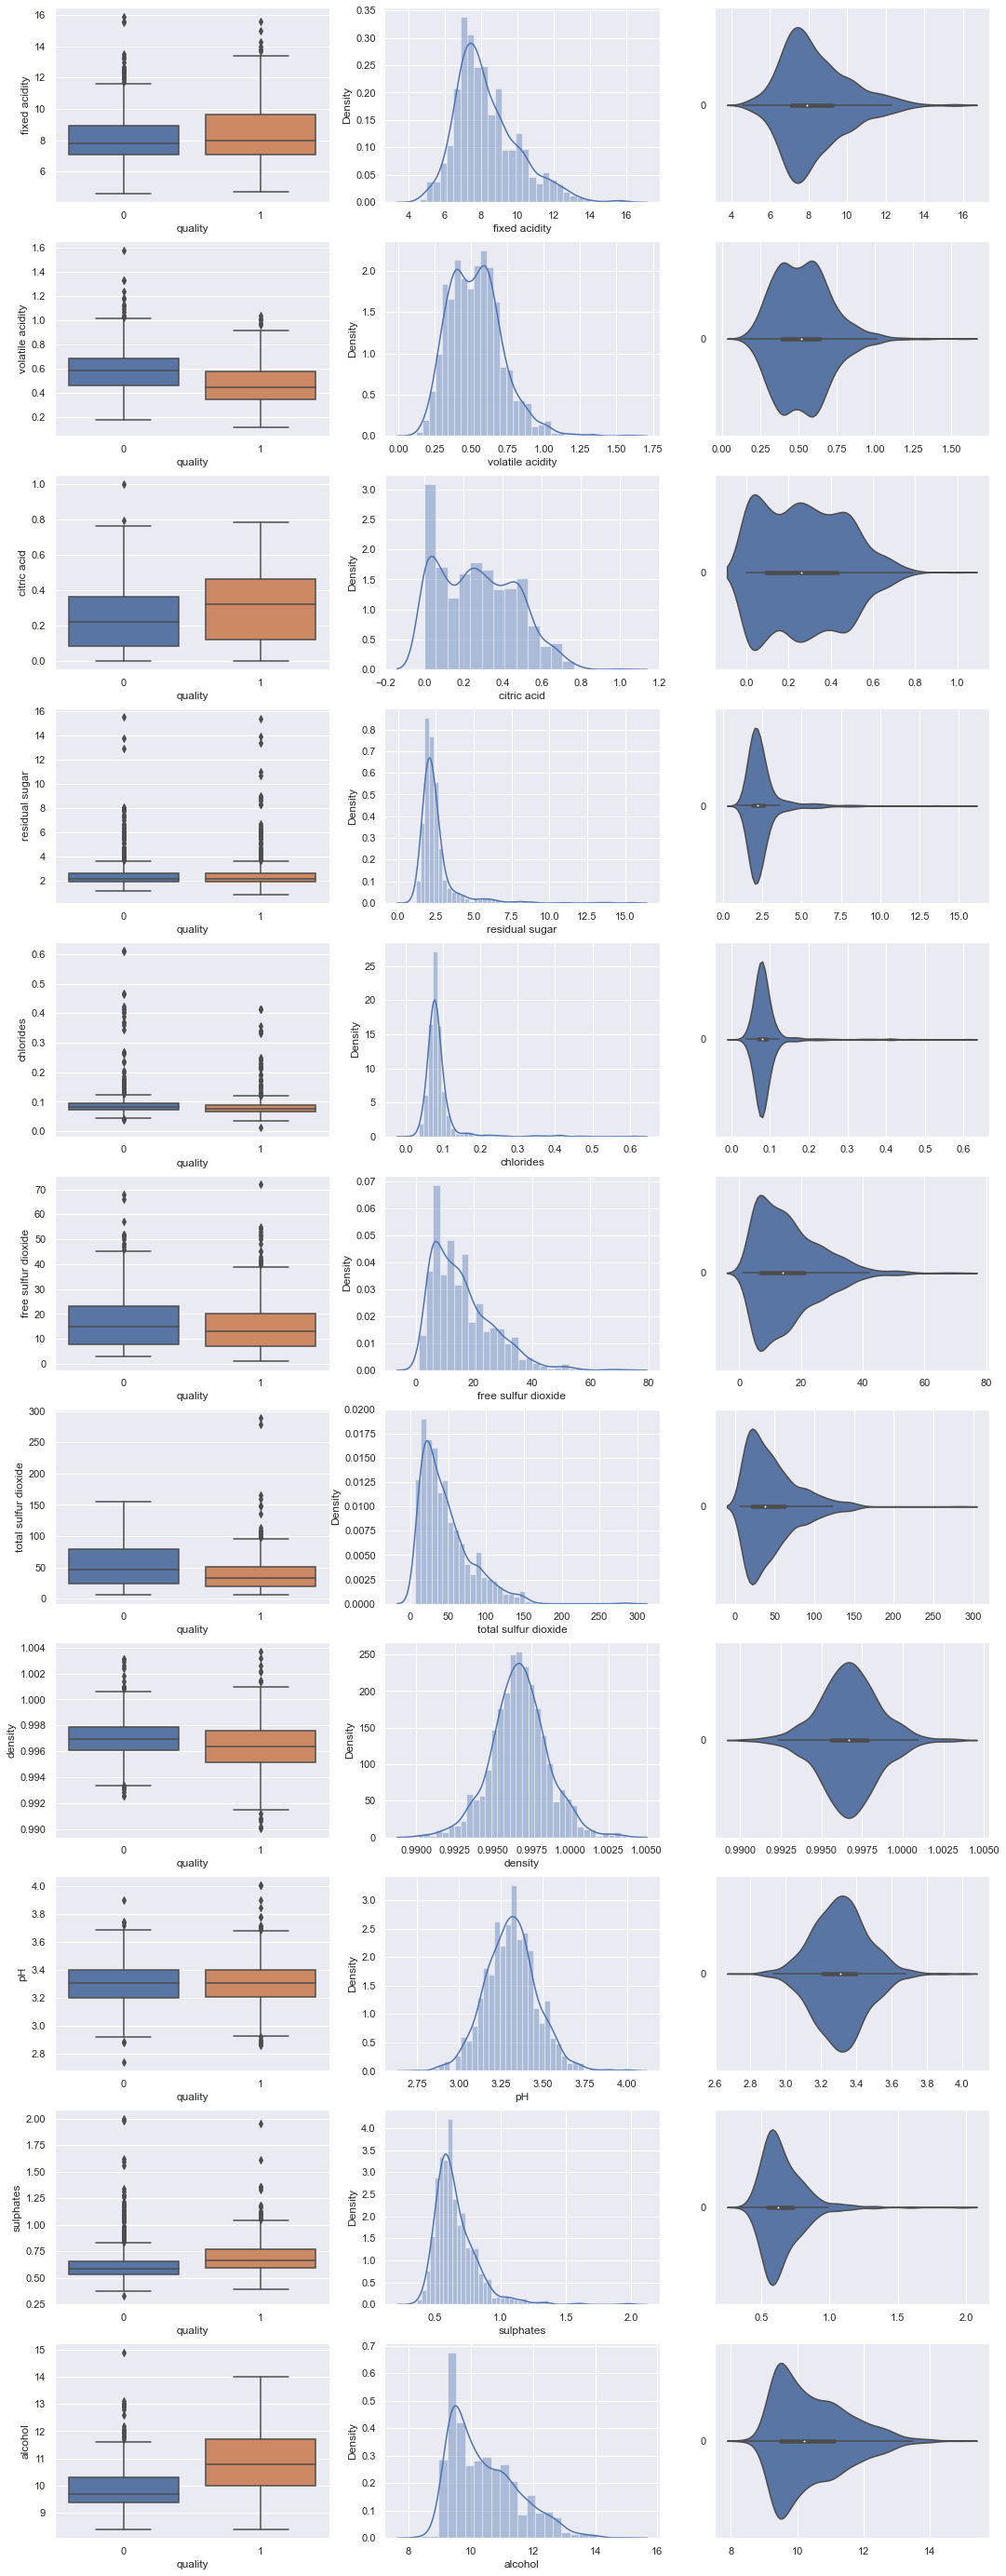

In [4]:
listOfVariables = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
f, axes = plt.subplots(len(listOfVariables), 3, figsize=(18, 50))
count = 0
for var in listOfVariables:
    sns.boxplot(data=wine_data, x='quality', y=listOfVariables[count], ax = axes[count, 0])
    sns.distplot(wine_data[var], ax = axes[count,1])
    sns.violinplot(data = wine_data[var], orient = "h", ax = axes[count,2])
    count+=1

As observed from the box plots, the median, min, max, 1st quartile, and 3rd quartile values for pH and residual sugar, do not vary significantly for qualities good and bad. This suggests there is no strong relationship between these 2 variables and the quality of the wine. 

Hence, we decide to drop these columns.

In [3]:
wine_data_dropped = wine_data.drop(columns=['pH', 'residual sugar'])

wine_data_dropped

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4,0
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,0.68,9.8,0
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,0.65,9.8,0
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,0.58,9.8,1
4,7.4,0.660,0.00,0.075,13.0,40.0,0.99780,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,0.068,28.0,38.0,0.99651,0.82,9.5,1
1355,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,0.58,10.5,0
1356,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,0.76,11.2,1
1357,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,0.71,10.2,0


<h1>Machine Learning</h1>

We split the dataset into the predictors (X) and the response variable 'quality' (y).

In [4]:
target_label = 'quality'
X = wine_data_dropped.drop([target_label], axis=1)
y = wine_data_dropped[target_label]

([<matplotlib.axis.XTick at 0x1de50e301c0>,
 <a list of 2 Text major ticklabel objects>)

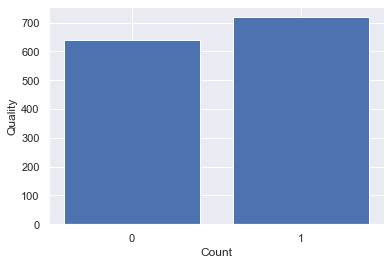

In [5]:
plt.bar(x = y.value_counts().index.tolist(),
       height = y.value_counts())
plt.xlabel('Count')
plt.ylabel('Quality')
plt.xticks([0,1])

<h2> Train Test Split </h2>

We use the train_test_split() function to split the dataset into the train set, and the test set, with a test size of 0.2.
We also specify stratify = y. This is to ensure that the ratio of good:bad values are consistent throughout the train set and the test set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

<h2>Model Fitting & Hyperparameter Tuning</h2>

For each of the models used below, the GridSearchCV function is used to determine the optimal hyperparameters for each model (i.e. the hyperparameters which result in the highest accuracy scores on the trainset). 5-fold cross validation is used to obtain unbiased results as well as to determine the optimal hyperparameters of each model.

In [9]:
# Importing libraries used for model fitting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<H2> (1) Logistic Regression </H2>

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category. 
It is a simple and more efficient method for binary and linear classification problems. It performs relatively well in our dataset as our response variables are binary. 


In [10]:
param_grid = {'penalty':['l1', 'l2', 'elasticnet'],
              'C': np.logspace(-3, 3, 7),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'random_state': [42]}

grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=1)
grid_search_logreg.fit(X_train,y_train)
print("Best parameters: ", grid_search_logreg.best_params_)
print("Best CV score: ", grid_search_logreg.best_score_)

best_logreg = LogisticRegression(**grid_search_logreg.best_params_).fit(X_train, y_train)
print("Test accuracy: ", best_logreg.score(X_test, y_test))

Best parameters:  {'C': 1000.0, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Best CV score:  0.743322200143745
Test accuracy:  0.7352941176470589


<h2> (2) Gaussian Naive Bayes </h2>

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

For our dataset, we chose to use Gaussian Naive Bayes where the likelihood of each predictor is assumed to be Gaussian (normal distribution).

In [11]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100),}

grid_search_gnb = GridSearchCV(GaussianNB(), param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1)
grid_search_gnb.fit(X_train,y_train)
print("Best parameters: ", grid_search_gnb.best_params_)
print("Best CV score: ", grid_search_gnb.best_score_)

best_gnb = GaussianNB(**grid_search_gnb.best_params_).fit(X_train, y_train)
print("Test accuracy: ", best_gnb.score(X_test, y_test))

Best parameters:  {'var_smoothing': 2.310129700083158e-08}
Best CV score:  0.7322749756901873
Test accuracy:  0.7352941176470589


<h2> (3) Decision Tree Classifier </h2>

The Decision Tree Classifier belongs to the family of supervised learning algorithms. The intuition behind Decision Trees is that you use the dataset features to create yes/no questions and continually split the dataset until you isolate all data points belonging to each class. The Decision Tree classifier can handle both categorical and numerical data (numerical data as predictors in this dataset), and is simple to understand and interpret since the trees can be visualised.

In [12]:
param_grid = {'max_depth':[None, [i for i in range(1,50,1)]],
             'random_state': [42]}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1)

grid_search_dtc.fit(X_train,y_train)
print("Best parameters: ", grid_search_dtc.best_params_)
print("Best CV score: ", grid_search_dtc.best_score_)

best_dtc = DecisionTreeClassifier(**grid_search_dtc.best_params_).fit(X_train, y_train)
print("Test accuracy: ", best_dtc.score(X_test, y_test))

Best parameters:  {'max_depth': None, 'random_state': 42}
Best CV score:  0.6587198241237898
Test accuracy:  0.6213235294117647


<h2> (4) Random Forest Classifier </h2>

The Random Forest Classifier builds multiple decision trees and merges them together to get a more accurate and stable prediction. One big advantage of random forest is that it can be used for both classification and regression problems, and is suitable for binary classification of wines in this dataset.  Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in an improved model.

In [13]:
param_grid = {'max_depth':[i for i in range(1,30,3)],
             'n_estimators': [j for j in range(10, 601, 40)],
             'random_state': [42]}


grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1)

grid_search_rfc.fit(X_train,y_train)
print("Best parameters: ", grid_search_rfc.best_params_)
print("Best CV score: ", grid_search_rfc.best_score_)

best_rfc = RandomForestClassifier(**grid_search_rfc.best_params_).fit(X_train, y_train)
print("Test accuracy: ", best_rfc.score(X_test, y_test))

Best parameters:  {'max_depth': 7, 'n_estimators': 50, 'random_state': 42}
Best CV score:  0.7598697839597514
Test accuracy:  0.7647058823529411


<h2> (5) AdaBoost Classifier </h2>

AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get a high accuracy strong classifier. The method automatically adjusts its parameters to the data based on the actual performance in the current iteration, meaning, both the weights for re-weighting the data and the weights for the final aggregation are re-computed iteratively.


In [14]:
param_grid = {'learning_rate':[0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
             'n_estimators': [j for j in range(10, 601, 40)],
             'random_state': [42]}

grid_search_abc = GridSearchCV(AdaBoostClassifier(), param_grid, cv= KFold(5, shuffle=True, random_state=42), n_jobs=-1)

grid_search_abc.fit(X_train,y_train)
print("Best parameters: ", grid_search_abc.best_params_)
print("Best CV score: ", grid_search_abc.best_score_)

best_abc = AdaBoostClassifier(**grid_search_abc.best_params_).fit(X_train, y_train)
print("Test accuracy: ", best_abc.score(X_test, y_test))

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 42}
Best CV score:  0.7479220394875915
Test accuracy:  0.7463235294117647


<h2> (6) CatBoost Classifier </h2>

The CatBoost Classifier is a high-performance open source library for gradient boosting on decision trees. In the growing procedure of the decision trees, CatBoost does not follow similar gradient boosting models. Instead, CatBoost grows oblivious trees, which means that the trees are grown by imposing the rule that all nodes at the same level, test the same predictor with the same condition, and hence an index of a leaf can be calculated with bitwise operations.

In [15]:
from catboost import CatBoostClassifier

param_grid = {'learning_rate': [0.08, 0.1, 0.15, 0.2, 0.25, 0.3], 
             'n_estimators': [200, 250, 300, 350, 400, 450, 500],
             'random_state': [42]}


grid_search_cbc = GridSearchCV(CatBoostClassifier(), param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1)

grid_search_cbc.fit(X_train, y_train, silent=True)
print("Best parameters: ", grid_search_cbc.best_params_)
print("Best CV score: ", grid_search_cbc.best_score_)

best_cbc = CatBoostClassifier(**grid_search_cbc.best_params_).fit(X_train, y_train, silent=True)
print("Test accuracy: ", best_cbc.score(X_test, y_test))

0:	learn: 0.6569266	total: 154ms	remaining: 38.3s
1:	learn: 0.6231008	total: 157ms	remaining: 19.5s
2:	learn: 0.5935753	total: 161ms	remaining: 13.3s
3:	learn: 0.5722668	total: 164ms	remaining: 10.1s
4:	learn: 0.5577336	total: 166ms	remaining: 8.13s
5:	learn: 0.5433290	total: 167ms	remaining: 6.81s
6:	learn: 0.5309836	total: 169ms	remaining: 5.87s
7:	learn: 0.5187198	total: 171ms	remaining: 5.17s
8:	learn: 0.5133810	total: 173ms	remaining: 4.63s
9:	learn: 0.5063087	total: 175ms	remaining: 4.19s
10:	learn: 0.4957368	total: 176ms	remaining: 3.83s
11:	learn: 0.4872407	total: 178ms	remaining: 3.53s
12:	learn: 0.4823048	total: 180ms	remaining: 3.28s
13:	learn: 0.4755885	total: 181ms	remaining: 3.06s
14:	learn: 0.4694813	total: 183ms	remaining: 2.87s
15:	learn: 0.4648503	total: 185ms	remaining: 2.71s
16:	learn: 0.4614487	total: 187ms	remaining: 2.56s
17:	learn: 0.4571154	total: 189ms	remaining: 2.43s
18:	learn: 0.4537452	total: 190ms	remaining: 2.31s
19:	learn: 0.4467171	total: 193ms	remaini

165:	learn: 0.1852265	total: 463ms	remaining: 234ms
166:	learn: 0.1838853	total: 465ms	remaining: 231ms
167:	learn: 0.1819334	total: 467ms	remaining: 228ms
168:	learn: 0.1807815	total: 469ms	remaining: 225ms
169:	learn: 0.1798685	total: 471ms	remaining: 221ms
170:	learn: 0.1790726	total: 472ms	remaining: 218ms
171:	learn: 0.1782045	total: 474ms	remaining: 215ms
172:	learn: 0.1771199	total: 476ms	remaining: 212ms
173:	learn: 0.1759353	total: 478ms	remaining: 209ms
174:	learn: 0.1739677	total: 481ms	remaining: 206ms
175:	learn: 0.1719485	total: 483ms	remaining: 203ms
176:	learn: 0.1706633	total: 484ms	remaining: 200ms
177:	learn: 0.1699378	total: 486ms	remaining: 197ms
178:	learn: 0.1682638	total: 488ms	remaining: 194ms
179:	learn: 0.1668396	total: 490ms	remaining: 191ms
180:	learn: 0.1658810	total: 492ms	remaining: 188ms
181:	learn: 0.1647443	total: 494ms	remaining: 185ms
182:	learn: 0.1641283	total: 497ms	remaining: 182ms
183:	learn: 0.1626761	total: 499ms	remaining: 179ms
184:	learn: 

136:	learn: 0.2191376	total: 265ms	remaining: 218ms
137:	learn: 0.2168200	total: 267ms	remaining: 216ms
138:	learn: 0.2167024	total: 269ms	remaining: 215ms
139:	learn: 0.2149529	total: 271ms	remaining: 213ms
140:	learn: 0.2140676	total: 273ms	remaining: 211ms
141:	learn: 0.2136916	total: 274ms	remaining: 209ms
142:	learn: 0.2128174	total: 277ms	remaining: 207ms
143:	learn: 0.2114351	total: 279ms	remaining: 205ms
144:	learn: 0.2089284	total: 281ms	remaining: 203ms
145:	learn: 0.2077322	total: 283ms	remaining: 201ms
146:	learn: 0.2066459	total: 285ms	remaining: 199ms
147:	learn: 0.2065454	total: 286ms	remaining: 197ms
148:	learn: 0.2054086	total: 288ms	remaining: 195ms
149:	learn: 0.2043140	total: 290ms	remaining: 193ms
150:	learn: 0.2033347	total: 292ms	remaining: 191ms
151:	learn: 0.2020690	total: 294ms	remaining: 190ms
152:	learn: 0.2003072	total: 296ms	remaining: 188ms
153:	learn: 0.1999787	total: 298ms	remaining: 186ms
154:	learn: 0.1986697	total: 300ms	remaining: 184ms
155:	learn: 

<h2> (7) GradientBoost Classifier </h2>

Gradient Boosting Classifiers are the AdaBoosting method combined with weighted minimization, after which the classifiers and weighted inputs are recalculated. The objective of Gradient Boosting Classifiers is to minimize the loss, or the difference between the actual class value of the training example and the predicted class value.

In [16]:
param_grid = {'learning_rate':[0.008, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24], 
             'n_estimators': [100, 150, 200, 250, 300, 350, 400, 500, 550, 600],
             'random_state': [42]}

grid_search_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1)

grid_search_gbc.fit(X_train,y_train)
print("Best parameters: ", grid_search_gbc.best_params_)
print("Best CV score: ", grid_search_gbc.best_score_)

best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_).fit(X_train, y_train)
print("Test accuracy: ", best_gbc.score(X_test, y_test))

Best parameters:  {'learning_rate': 0.008, 'n_estimators': 400, 'random_state': 42}
Best CV score:  0.7469961527079018
Test accuracy:  0.75


<h2> Conclusion </h2>

Using the dataset with no duplicates and with feature selection (columns removed), we note that the Random Forest Classifier performs the best with a classification accuracy of 76.47%.